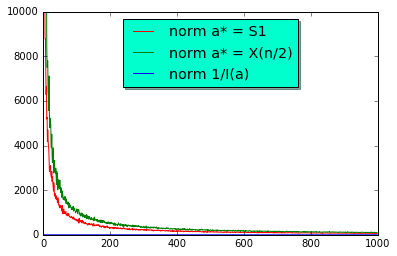

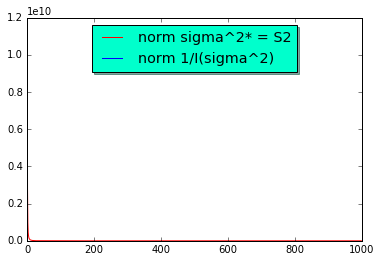

In [22]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from numpy import random
from matplotlib import rcParams
import math
%matplotlib inline

N = 10**3
m = 50
a = 3
sigma_kv = 2.1
p = 1/2
K = 500
lam = 1



def get_param(arr):
    rand = random.randint(0, len(arr)-1)
    return float(arr[rand])

caushy_file = 'cauchy.txt'
weibull_file = 'weibull.txt'
f = open(caushy_file) 
param2 = get_param(f.readlines())



def disp1(arr, a_zvezda):
    res = 0
    for i in range (len(arr) - 1):
        res += (a_zvezda - (sum(arr[i]) / (len(arr[i]))) )**2
    return res/len(arr)




def disp2(arr, sigma_zvezda):
    res = 0
    for i in range (len(arr) - 1):
        a_zv  = 0;
        for j in range (len(arr[i])):
            a_zv += (arr[i][j] - param2)**2
        a_zv = a_zv/N
        res += (sigma_zvezda - a_zv )**2
    return res/len(arr)

def disp3(arr, a_zvezda):
    res = 0
    for i in range (len(arr) - 1):
        np.ndarray.sort(arr[i])
        res += (a_zvezda - arr[i][round(len(arr[i])/2)])**2
    return res/len(arr)

def stat():
    
    X1 = random.normal(a, param2, size = N)
    X1_sorted = sorted(X1)
    X2 = random.normal(param2, sigma_kv, size = N)
    X3 = sps.binom.rvs(m,p, size = N)
    X4 = random.exponential(lam, size = N)
    
    
    X1_disp = []
    X1_disp1 = []
    summ = 0
    for i in range (N - 1):
        summ += X1[i]
        a_n = summ / (i+1)
        a_n1 = X1_sorted[round(i / 2)]
        X1_but = [random.normal(a_n, param2, size = i+1) for j in range(K)]
        X1_disp += [disp1(X1_but, a_n)]
        X1_sorted_but = [random.normal(a_n1, param2, size = i+1) for j in range(K)]
        X1_disp1 += [disp3(X1_sorted_but, a_n1)]
        
    n = range(N-1)
    
    X1_i = []
    for i in range (N-1):
        X1_i += [sigma_kv / (i+1)]
        
    plt.plot(n, X1_disp, color = 'r', label = "norm a* = S1")
    plt.plot(n, X1_disp1, color = 'g', label = "norm a* = X(n/2)")
    plt.plot(n, X1_i, color = 'b', label = "norm 1/I(a)")
    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    legend.get_frame().set_facecolor('#00FFCC')
    plt.ylim(0, 10000.)
    plt.show()
    
    
    
    X2_disp = []
    summ_kv = 0
    for i in range (N - 1):
        summ_kv += (X2[i] - param2)**2
        sigma_n = summ/ (i+1)
        X2_but = [random.normal(param2, sigma_n , size = i+1) for j in range(K)]
        X2_disp += [disp2( X2_but, sigma_n)]
    X2_i = []
    for i in range (N-1):
        X2_i += [2* sigma_kv**2 / (i+1)]
    plt.plot(n, X2_disp, color = 'r', label = "norm sigma^2* = S2")
    plt.plot(n, X2_i, color = 'b', label = "norm 1/I(sigma^2)")
    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    legend.get_frame().set_facecolor('#00FFCC')
    #plt.ylim(0, 1.)
    plt.show()
    
    

stat()



/home/riv/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: divide by zero encountered in true_divide
/home/riv/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:39: RuntimeWarning: invalid value encountered in double_scalars


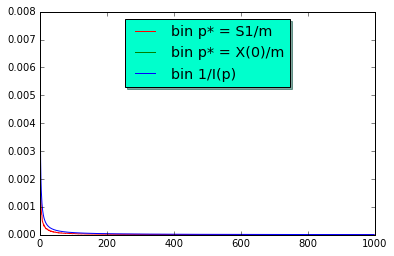

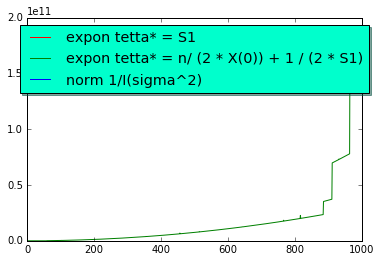

In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from numpy import random
from matplotlib import rcParams
import math
%matplotlib inline

N = 10**3
m = 50
p = np.random.random()
K = 500
lam = 1



def get_param(arr):
    rand = random.randint(0, len(arr)-1)
    return float(arr[rand])

caushy_file = 'cauchy.txt'
weibull_file = 'weibull.txt'
f = open(caushy_file) 
param2 = get_param(f.readlines())



def disp1(arr, a_zvezda):
    res = 0
    for i in range (len(arr) - 1):
        res += (a_zvezda - (sum(arr[i]) / (len(arr[i])))/m )**2
    return res/len(arr)


def disp3(arr, a_zvezda):
    res = 0
    for i in range (len(arr) - 1):
        np.ndarray.sort(arr[i])
        res += (a_zvezda - len(arr[i])/ 2 / sum(arr[i]) + len(arr[i]) / 2 / arr[i][0])**2
    return res/len(arr)

def stat():
    
    X1 = sps.binom.rvs(m,p, size = N)
    X1_sorted = sorted(X1)
    X2 = random.exponential(lam, size = N)
    
    
    X1_disp = []
    X1_disp1 = []
    summ = 0
    for i in range (N - 1):
        summ += X1[i]
        a_n = summ / (i+1) / m
        a_n1 = X1_sorted[0] / m
        X1_but = [sps.binom.rvs(m, a_n, size = i+1) for j in range(K)]
        X1_sorted_but = [sps.binom.rvs(m , a_n1, size = i+1) for j in range(K)]
        X1_disp += [disp1(X1_but, a_n)]
        X1_disp1 += [disp3(X1_sorted_but, a_n1)]
        
    n = range(N-1)
    
    X1_i = []
    for i in range (N-1):
        X1_i += [p*(p+1) / (i+1) /m]
        
    plt.plot(n, X1_disp, color = 'r', label = "bin p* = S1/m")
    plt.plot(n, X1_disp1, color = 'g', label = "bin p* = X(0)/m")
    plt.plot(n, X1_i, color = 'b', label = "bin 1/I(p)")
    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    legend.get_frame().set_facecolor('#00FFCC')
    #plt.ylim(0, 100000.)
    plt.show()
    
    
    
    X2_disp = []
    X2_disp1 = []
    X2_strange_but = []
    summ = 0
    for i in range (N - 1):
        X2_sorted = sorted(X2[0:(i+1):])
        summ += X2[i]
        tetta_n = summ/ (i+1)
        tetta_strange_n =  (i+1) / 2 / summ +(i+1) / 2 / X2_sorted[0] 
        X2_but = [random.exponential(tetta_n , size = i+1) for j in range(K)]
        X2_strange_but = [random.exponential(tetta_strange_n , size = i+1) for j in range(K)]
        X2_disp += [disp1(X2_but, tetta_n)]
        X2_disp1 += [disp3(X2_strange_but,tetta_strange_n )]
    X2_i = []
    for i in range (N-1):
        X2_i += [lam**2 / (i+1)]
    plt.plot(n, X2_disp, color = 'r', label = "expon tetta* = S1")
    plt.plot(n, X2_disp1, color = 'g', label = "expon tetta* = n/ (2 * X(0)) + 1 / (2 * S1)")
    plt.plot(n, X2_i, color = 'b', label = "norm 1/I(sigma^2)")
    legend = plt.legend(loc='upper center', shadow=True, fontsize='x-large')
    legend.get_frame().set_facecolor('#00FFCC')
    #plt.ylim(0, 1.)
    plt.show()
    
    

stat()

